In [132]:
import re
import pandas as pd

In [133]:
def preprocess(data):
    pattern = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

    messages = re.split(pattern, data)[1:]
    dates = re.findall(pattern, data)

    df = pd.DataFrame({'user_message': messages, 'date': dates})
    # convert message_date type
    df['date'] = pd.to_datetime(df['date'], format=r'%d/%m/%Y, %H:%M - ')


    users = []
    messages = []
    for message in df['user_message']:
        entry = re.split(r'([\w\W]+?):\s', message)
        if entry[1:]:  # user name
            users.append(entry[1])
            messages.append(" ".join(entry[2:]))
        else:
            users.append('group_notification')
            messages.append(entry[0])

    df['user'] = users
    df['message'] = messages
    df.drop(columns=['user_message'], inplace=True)

    df['only_date'] = df['date'].dt.date
    df['year'] = df['date'].dt.year
    df['month_num'] = df['date'].dt.month
    df['month'] = df['date'].dt.month_name()
    df['day'] = df['date'].dt.day
    df['day_name'] = df['date'].dt.day_name()
    df['hour'] = df['date'].dt.hour
    df['minute'] = df['date'].dt.minute

    period = []
    for hour in df[['day_name', 'hour']]['hour']:
        if hour == 23:
            period.append(str(hour) + "-" + str('0'))
        else:
            period.append(str(hour) + "-" + str(hour + 1))

    df['period'] = period

    return df

13 columns at the end of this...
[
'date', 
'user', 
'message',
'only_date', 
'year', 
'month_num', 
'month',
'day', 
'day_name', 
'hour', 
'minute', 
'period'
]

In [134]:
# 1. read file
with open('/Users/arijitsingh/Documents/thapar_sem5/ml_project/wca/chats/WhatsApp Chat with GSoC 2026.txt', encoding='utf-8') as f:
    raw_text = f.read()

In [135]:
print(raw_text)

22/08/2025, 12:59 - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.
21/08/2025, 17:34 - ~ Ayush created group "GSoc 2026"
22/08/2025, 12:59 - You joined using a group link.
22/08/2025, 13:03 - +91 80086 95077 joined using a group link.
22/08/2025, 13:22 - ~ A was added
22/08/2025, 13:14 - +91 62642 70773 joined using a group link.
22/08/2025, 13:19 - +91 95962 99968 joined using a group link.
22/08/2025, 13:22 - +91 95962 99968: Hlo everyone,  just joined this group via reddit, 
I am Abraz mohi ud din, from Kashmir, pursuing Btech in computer science.
can anyone explain how 
Things work in this group
22/08/2025, 13:47 - +91 70456 38616: We are still figuring out things ...
22/08/2025, 13:45 - +91 91136 12374 joined using a group link.
22/08/2025, 13:55 - +91 88827 45233: 👀👀
22/08/2025, 14:09 - +91 95962 99968: Have u guys discussed anything yet?
22/08/2025, 14:09 - +91 70456 38616: Not yet
22/08/2025, 14:10 - +91 959

In [136]:
print(type(raw_text))

<class 'str'>


In [137]:
# 2. running pipeline
df = preprocess(raw_text)

In [138]:
# 3. inspect
print(df.columns)
print(df.shape)
df.head()

Index(['date', 'user', 'message', 'only_date', 'year', 'month_num', 'month',
       'day', 'day_name', 'hour', 'minute', 'period'],
      dtype='object')
(1610, 12)


,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period
0,2025-08-22 12:59:00,group_notification,Messages and calls are end-to-end encrypted. O...,2025-08-22,2025,8,August,22,Friday,12,59,12-13
1,2025-08-21 17:34:00,group_notification,"~ Ayush created group ""GSoc 2026""\n",2025-08-21,2025,8,August,21,Thursday,17,34,17-18
2,2025-08-22 12:59:00,group_notification,You joined using a group link.\n,2025-08-22,2025,8,August,22,Friday,12,59,12-13
3,2025-08-22 13:03:00,group_notification,+91 80086 95077 joined using a group link.\n,2025-08-22,2025,8,August,22,Friday,13,3,13-14
4,2025-08-22 13:22:00,group_notification,~ A was added\n,2025-08-22,2025,8,August,22,Friday,13,22,13-14


In [139]:
df.sample(5)

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period
799,2025-09-10 17:11:00,+91 79033 07775,I am from bihar\n,2025-09-10,2025,9,September,10,Wednesday,17,11,17-18
1014,2025-09-16 12:30:00,+91 89578 11952,FOR FREE COURSE check out https://youtube.c...,2025-09-16,2025,9,September,16,Tuesday,12,30,12-13
1268,2025-09-17 19:44:00,+91 62010 06188,Oh\n,2025-09-17,2025,9,September,17,Wednesday,19,44,19-20
758,2025-09-08 23:04:00,group_notification,+91 82984 99409 joined using a group link.\n,2025-09-08,2025,9,September,8,Monday,23,4,23-0
225,2025-08-25 12:48:00,+91 81294 12156,Makes sense\n,2025-08-25,2025,8,August,25,Monday,12,48,12-13


In [140]:
df.size

19320

In [141]:
print(df['message'])

0       Messages and calls are end-to-end encrypted. O...
1                     ~ Ayush created group "GSoc 2026"\n
2                        You joined using a group link.\n
3            +91 80086 95077 joined using a group link.\n
4                                         ~ A was added\n
                              ...                        
1605         +60 11-3316 1075 joined from the community\n
1606                             People from iits dm me\n
1607                                            Me too,\n
1608                          +91 63889 25854 was added\n
1609         +91 63889 25854 joined using a group link.\n
Name: message, Length: 1610, dtype: object


In [142]:
words = []
for message in df['message']:
    words.extend((message.split()))
    

In [143]:
len(words) # this is number of words type by all memebers of that group since i came into that group..
# or since i started recieving messages in group 

14016

In [144]:
print(df['message'].sample(10))

811     Focus on one stack, they have some knowledge o...
139      POLL  Discord voice chat at night?\nOPTION  Y...
17           +91 70615 51501 joined using a group link.\n
331                         https://discord.gg/SPRhN4H9\n
1280                  Check group description bro first\n
180                                        Am i correct\n
867                                                  Ig\n
1555    +91 94323 86627 turned off admin approval to j...
1394    I find it hard reading code on GitHub\nWhat sh...
1379         +91 63058 64053 joined using a group link.\n
Name: message, dtype: object


In [145]:
# for every message there is \n at the end always...

In [146]:
df[df['message'] == '<Media omitted>\n']

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period
361,2025-08-27 23:08:00,+91 81042 05239,<Media omitted>\n,2025-08-27,2025,8,August,27,Wednesday,23,8,23-0
477,2025-08-30 23:21:00,+91 77190 14887,<Media omitted>\n,2025-08-30,2025,8,August,30,Saturday,23,21,23-0
518,2025-08-30 23:38:00,+91 85058 56478,<Media omitted>\n,2025-08-30,2025,8,August,30,Saturday,23,38,23-0
554,2025-08-31 15:07:00,+91 80741 07291,<Media omitted>\n,2025-08-31,2025,8,August,31,Sunday,15,7,15-16
562,2025-09-01 14:18:00,+91 92410 74008,<Media omitted>\n,2025-09-01,2025,9,September,1,Monday,14,18,14-15
740,2025-09-08 12:24:00,+91 97075 78703,<Media omitted>\n,2025-09-08,2025,9,September,8,Monday,12,24,12-13
956,2025-09-13 20:49:00,+91 89578 11952,<Media omitted>\n,2025-09-13,2025,9,September,13,Saturday,20,49,20-21
1109,2025-09-16 15:44:00,+977 976-5826617,<Media omitted>\n,2025-09-16,2025,9,September,16,Tuesday,15,44,15-16
1272,2025-09-17 20:28:00,+91 99743 98796,<Media omitted>\n,2025-09-17,2025,9,September,17,Wednesday,20,28,20-21
1308,2025-09-17 23:20:00,+91 94323 86627,<Media omitted>\n,2025-09-17,2025,9,September,17,Wednesday,23,20,23-0


In [147]:
df['message'].str.contains(r'(https?://\S+|www\.\S+)', regex=True).sum()

/var/folders/vp/mhbkf2gs397d1pq5hhxflp6h0000gn/T/ipykernel_72571/3627925612.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['message'].str.contains(r'(https?://\S+|www\.\S+)', regex=True).sum()


np.int64(34)

In [148]:
import urlextract

In [149]:
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("Text with URLs. Let's have URL janlipovsky.cz as an example.")
print(urls) # prints: ['janlipovsky.cz']


['janlipovsky.cz']


In [150]:
x =df['user'].value_counts().head()
# this is a series naa... 
# so it has two parts one index and other value... 

In [151]:
import matplotlib.pyplot as plt

In [152]:
name = x.index
count = x.values

([0, 1, 2, 3, 4],
 [Text(0, 0, 'group_notification'),
  Text(1, 0, '+91 99743 98796'),
  Text(2, 0, '+91 94323 86627'),
  Text(3, 0, '+977 976-5826617'),
  Text(4, 0, '+91 81042 05239')])

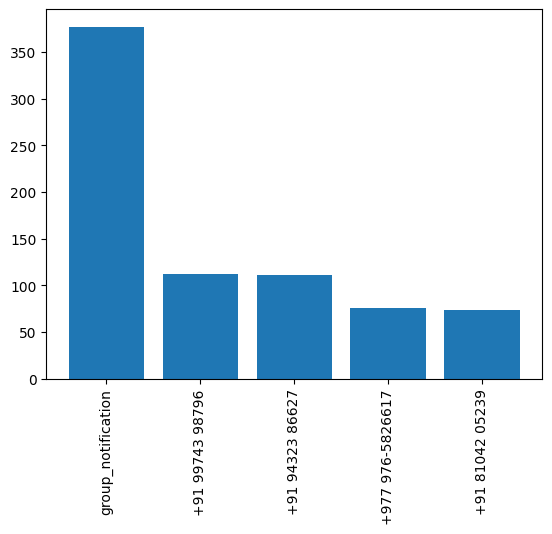

In [153]:
plt.bar(name,count)
plt.xticks(rotation= 'vertical')

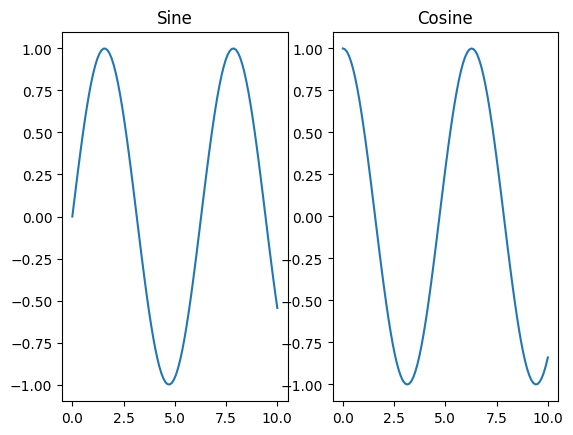

In [154]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

fig, axes = plt.subplots(1, 2)        # 1 row, 2 columns

axes[0].plot(x, np.sin(x))
axes[0].set_title("Sine")

axes[1].plot(x, np.cos(x))
axes[1].set_title("Cosine")

plt.show()


Text(0.5, 1.0, 'Pie Chart')

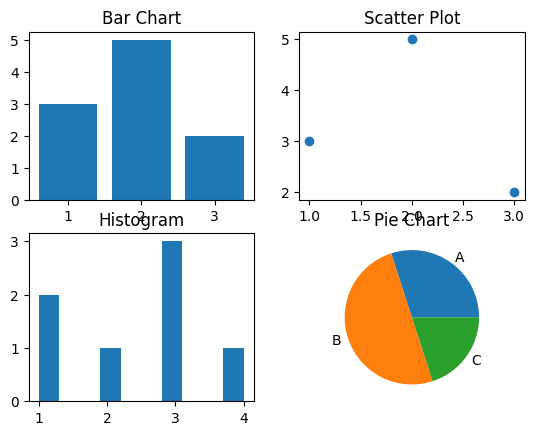

In [155]:
fig, axes = plt.subplots(2, 2)

axes[0, 0].bar([1,2,3], [3,5,2])
axes[0, 0].set_title("Bar Chart")

axes[0, 1].scatter([1,2,3], [3,5,2])
axes[0, 1].set_title("Scatter Plot")

axes[1, 0].hist([1,1,2,3,3,3,4])
axes[1, 0].set_title("Histogram")

axes[1, 1].pie([30, 50, 20], labels=["A","B","C"])
axes[1, 1].set_title("Pie Chart")

In [156]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns= {'user':'name', 'count':'percent'})

,name,percent
0,group_notification,23.42
1,+91 99743 98796,6.96
2,+91 94323 86627,6.89
3,+977 976-5826617,4.72
4,+91 81042 05239,4.60
...,...,...
95,+91 96994 97291,0.06
96,+91 95292 90563,0.06
97,+91 86380 78177,0.06
98,+91 98305 49584,0.06


In [157]:
words = []
for message in df['message']:
    words.extend(message.split())
    

In [158]:
words

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'Only',
 'people',
 'in',
 'this',
 'chat',
 'can',
 'read,',
 'listen',
 'to,',
 'or',
 'share',
 'them.',
 'Learn',
 'more.',
 '~',
 'Ayush',
 'created',
 'group',
 '"GSoc',
 '2026"',
 'You',
 'joined',
 'using',
 'a',
 'group',
 'link.',
 '+91',
 '80086',
 '95077',
 'joined',
 'using',
 'a',
 'group',
 'link.',
 '~',
 'A',
 'was',
 'added',
 '+91',
 '62642',
 '70773',
 'joined',
 'using',
 'a',
 'group',
 'link.',
 '+91',
 '95962',
 '99968',
 'joined',
 'using',
 'a',
 'group',
 'link.',
 'Hlo',
 'everyone,',
 'just',
 'joined',
 'this',
 'group',
 'via',
 'reddit,',
 'I',
 'am',
 'Abraz',
 'mohi',
 'ud',
 'din,',
 'from',
 'Kashmir,',
 'pursuing',
 'Btech',
 'in',
 'computer',
 'science.',
 'can',
 'anyone',
 'explain',
 'how',
 'Things',
 'work',
 'in',
 'this',
 'group',
 'We',
 'are',
 'still',
 'figuring',
 'out',
 'things',
 '...',
 '+91',
 '91136',
 '12374',
 'joined',
 'using',
 'a',
 'group',
 'link.',
 '

In [159]:
from collections import Counter 
pd.DataFrame(Counter(words).most_common(50))

,0,1
0,a,361
1,group,286
2,+91,286
3,to,281
4,joined,260
5,using,255
6,link.,250
7,I,204
8,you,173
9,the,171


In [160]:
temp = df[df['user'] != 'group_notification']

In [161]:
temp = temp[temp['message'] != '<Media omitted>\n']

In [162]:
df.sample(5)

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period
761,2025-09-09 00:53:00,group_notification,~ Kavy Agrawal was added\n,2025-09-09,2025,9,September,9,Tuesday,0,53,0-1
764,2025-09-09 05:54:00,group_notification,+91 99757 48352 joined using a group link.\n,2025-09-09,2025,9,September,9,Tuesday,5,54,5-6
251,2025-08-25 13:01:00,+91 70376 23988,I'm a math graduate now i change my route to l...,2025-08-25,2025,8,August,25,Monday,13,1,13-14
963,2025-09-13 22:17:00,group_notification,+91 91109 75505 joined using a group link.\n,2025-09-13,2025,9,September,13,Saturday,22,17,22-23
1587,2025-10-02 01:44:00,group_notification,~ Sarika Yadav was added\n,2025-10-02,2025,10,October,2,Thursday,1,44,1-2


In [163]:
f = open('/Users/arijitsingh/Documents/thapar_sem5/ml_project/wca/stop_words/stop_hinglish.txt','r')

In [164]:
stop_words = f.read()

In [165]:
stop_words

".\n..\n...\n?\n-\n--\n+91\n1\n2\n3\n4\n5\n6\n7\n8\n9\n0\na\naadi\naaj\naap\naapne\naata\naati\naaya\naaye\nab\nabbe\nabbey\nabe\nabhi\nable\nabout\nabove\naccha\naccording\naccordingly\nacha\nachcha\nacross\nactually\nafter\nafterwards\nagain\nagainst\nagar\nain\naint\nain't\naisa\naise\naisi\nalag\nall\nallow\nallows\nalmost\nalone\nalong\nalready\nalso\nalthough\nalways\nam\namong\namongst\nan\nand\nandar\nanother\nany\nanybody\nanyhow\nanyone\nanything\nanyway\nanyways\nanywhere\nap\napan\napart\napna\napnaa\napne\napni\nappear\nare\naren\narent\naren't\naround\narre\nas\naside\nask\nasking\nat\naur\navum\naya\naye\nbaad\nbaar\nbad\nbahut\nbana\nbanae\nbanai\nbanao\nbanaya\nbanaye\nbanayi\nbanda\nbande\nbandi\nbane\nbani\nbas\nbata\nbatao\nbc\nbe\nbecame\nbecause\nbecome\nbecomes\nbecoming\nbeen\nbefore\nbeforehand\nbehind\nbeing\nbelow\nbeside\nbesides\nbest\nbetter\nbetween\nbeyond\nbhai\nbheetar\nbhi\nbhitar\nbht\nbilkul\nbohot\nbol\nbola\nbole\nboli\nbolo\nbolta\nbolte\nbolti\n

In [171]:
words = []
for message in df['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [172]:
pd.DataFrame(words)

,0
0,messages
1,calls
2,end-to-end
3,encrypted.
4,chat
...,...
6455,63889
6456,25854
6457,joined
6458,group


KeyError: '0'